In [2]:
import planetengine
import modelscripts

In [3]:
system = modelscripts.MS98X_systemscript.build()

In [4]:
initials = {
    'temperatureField': {'IC': planetengine.initials.sinusoidal.IC()},
    'materialVar': {'IC': planetengine.initials.extents.IC(([1], planetengine.shapes.trapezoid()))}
    }

In [5]:
planetengine.initials.apply(initials, system)

In [6]:
system.solve()

In [9]:
from underworld import function as fn

In [10]:
isYieldingFn = fn.branching.conditional([
    (system.creepViscFn > system.plasticViscFn, 1),
    (True, 0)
    ])

In [11]:
obsVars = {
    'temperature': system.temperatureField,
    'velocity': system.velocityField,
    'material': system.materialVar,
    'viscosity': system.viscosityFn,
    'yielding': isYieldingFn,
    }

Fitted 5 variables to the figure.



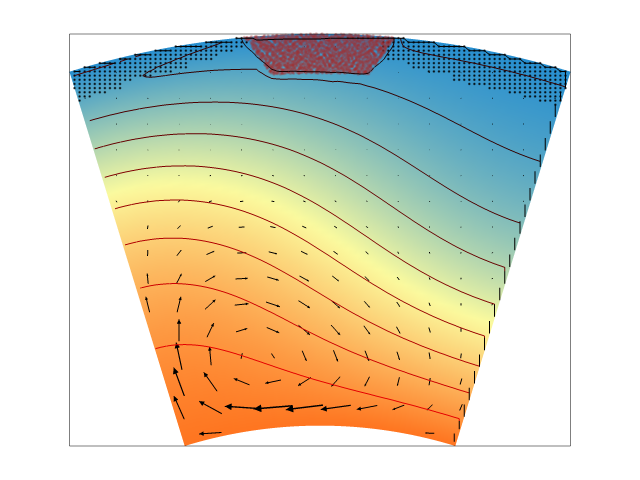

In [12]:
planetengine.quickShow(*obsVars.values())